<a href="https://colab.research.google.com/github/NajwaQu/Iris-Flower-Classification-Using-the-K-Nearest-Neighbors-Algorithm-/blob/main/Iris%20Flower%20Species%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT LIBRARY

In [3]:
# Impor library utama
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  accuracy_score, classification_report, confusion_matrix

LOAD DATA

In [4]:
iris = load_iris()
X = iris.data  # Fitur: panjang/lebar sepal & petal
y = iris.target  # Label: jenis bunga

# Deskripsi dataset
print(iris.DESCR)

# Lihat nama fitur dan target
print("Nama fitur:", iris.feature_names)
print("Nama target:", iris.target_names)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

**EXPLORATORY DATA ANALYSIS (EDA)**

In [5]:
# Memuat dataset Iris
iris = datasets.load_iris()

# Mengonversi ke DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Menambahkan kolom target dengan nama spesies bunga
df['species'] = iris.target
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})  # Mapping angka ke nama spesies

# Menampilkan DataFrame
df.sample(10, random_state=42)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
73,6.1,2.8,4.7,1.2,versicolor
18,5.7,3.8,1.7,0.3,setosa
118,7.7,2.6,6.9,2.3,virginica
78,6.0,2.9,4.5,1.5,versicolor
76,6.8,2.8,4.8,1.4,versicolor
31,5.4,3.4,1.5,0.4,setosa
64,5.6,2.9,3.6,1.3,versicolor
141,6.9,3.1,5.1,2.3,virginica
68,6.2,2.2,4.5,1.5,versicolor
82,5.8,2.7,3.9,1.2,versicolor


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Split Data**

In [8]:
X = df.drop(columns=['species'])
y = df['species']

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Jumlah data train: {X_train.shape[0]}, Jumlah data test: {X_test.shape[0]}")


Jumlah data train: 120, Jumlah data test: 30


**StandardScaler**

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled[:5])

[[-1.72156775 -0.33210111 -1.34572231 -1.32327558]
 [-1.12449223 -1.22765467  0.41450518  0.6517626 ]
 [ 1.14439475 -0.5559895   0.58484978  0.25675496]
 [-1.12449223  0.11567567 -1.28894078 -1.45494479]
 [-0.40800161 -1.22765467  0.13059752  0.12508575]]


**Training Model KNN**

In [10]:
# model KNN
knn = KNeighborsClassifier(n_neighbors=3)

# Latih model dengan data training
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

**EVALUATE MODEL (Confusion Matrix, Classification Report, Accuracy)**

Confusion Matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]



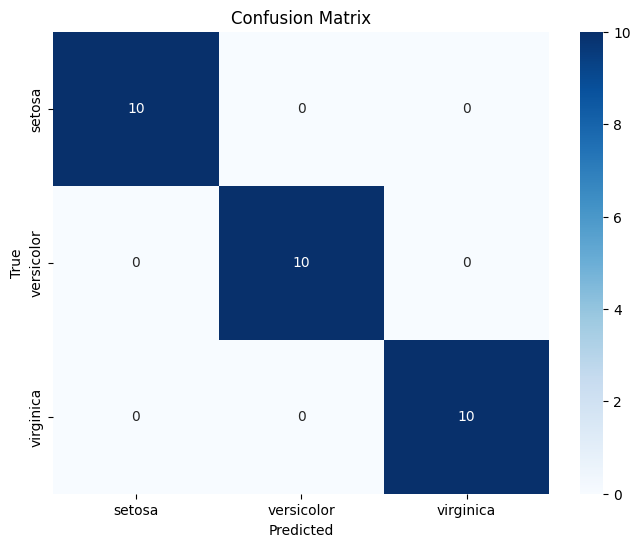


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Accuracy Score: 100.00%


In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = knn.predict(X_test)

# 1. Confusion Matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)
print()

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# 2. Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 3. Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy Score: {accuracy *100:.2f}%")


**Prediction Of a New Point**

In [ ]:
# Contoh data baru (panjang/lebarnya sepal dan petal)
sample = [[5.5, 2.4, 3.7, 1.0]]

# Normalisasi data baru
sample_scaled = scaler.transform(sample)

# Prediksi kelas
predicted_class = knn.predict(sample_scaled)
print(f"Prediksi kelas: {iris.target_names[predicted_class[0]]}")


Prediksi kelas: versicolor


**VISUALIZE IRIS DATA WITH PCA**

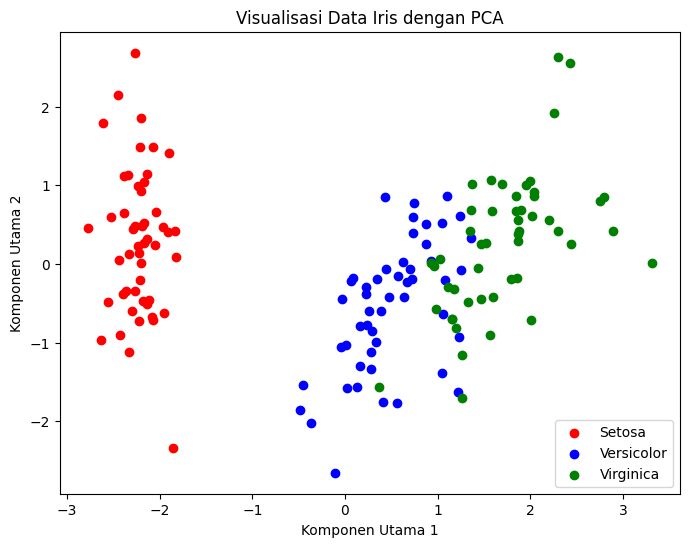

Prediksi kelas pada data pengujian: versicolor


In [ ]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualisasi data dengan PCA (dimensi 2D)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:50, 0], X_pca[:50, 1], c='red', label='Setosa')
plt.scatter(X_pca[50:100, 0], X_pca[50:100, 1], c='blue', label='Versicolor')
plt.scatter(X_pca[100:, 0], X_pca[100:, 1], c='green', label='Virginica')

# Memberi label pada grafik
plt.title("Visualisasi Data Iris dengan PCA")
plt.xlabel("Komponen Utama 1")
plt.ylabel("Komponen Utama 2")
plt.legend()
plt.show()

# Menampilkan hasil prediksi
print(f"Prediksi kelas pada data pengujian: {iris.target_names[y_pred[0]]}")
